In [0]:
#Run to get more RAM
a = []
while True:
    a.append(1e99)

In [0]:
#To mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight

In [0]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/merge_distance_intensity.csv")
df.shape

(661294, 34)

In [0]:
df.dropna(inplace=True)

df["damage_grade"] = df["damage_grade"].str.replace("Grade ", "")
df["damage_grade"] = df["damage_grade"].astype(int)
rubble = ["Damaged-Rubble unclear", "Damaged-Rubble clear", "Damaged-Rubble Clear-New building built"]
damage = ["Damaged-Used in risk", "Damaged-Repaired and used", "Damaged-Not used"]
landslide = "Covered by landslide"
nd = "Not damaged"

df["condition_post_eq"] = df["condition_post_eq"].replace(rubble, 2)
df["condition_post_eq"] = df["condition_post_eq"].replace(damage, 1)
df["condition_post_eq"] = df["condition_post_eq"].replace(landslide, 3)
df["condition_post_eq"] = df["condition_post_eq"].replace(nd, 0)

df["land_surface_condition"] = df["land_surface_condition"].replace("Flat", 0)
df["land_surface_condition"] = df["land_surface_condition"].replace("Moderate slope", 1)
df["land_surface_condition"] = df["land_surface_condition"].replace("Steep slope", 2)

df["foundation_type"] = df["foundation_type"].replace("Other",0)
df["foundation_type"] = df["foundation_type"].replace("Mud mortar-Stone/Brick",1)
df["foundation_type"] = df["foundation_type"].replace("Cement-Stone/Brick",1)
df["foundation_type"] = df["foundation_type"].replace("Bamboo/Timber",3)
df["foundation_type"] = df["foundation_type"].replace("RC",2)

df["roof_type"] = df["roof_type"].replace("RCC/RB/RBC",0)
df["roof_type"] = df["roof_type"].replace("Bamboo/Timber-Light roof",1)
df["roof_type"] = df["roof_type"].replace("Bamboo/Timber-Heavy roof",2)

df["ground_floor_type"] = df["ground_floor_type"].replace("Mud",1)
df["ground_floor_type"] = df["ground_floor_type"].replace("Brick/Stone",2)
df["ground_floor_type"] = df["ground_floor_type"].replace("RC",3)
df["ground_floor_type"] = df["ground_floor_type"].replace("Timber",4)
df["ground_floor_type"] = df["ground_floor_type"].replace("Other",0)

df["other_floor_type"] = df["other_floor_type"].replace("Not applicable",0)
df["other_floor_type"] = df["other_floor_type"].replace("TImber/Bamboo-Mud",3)
df["other_floor_type"] = df["other_floor_type"].replace("Timber-Planck",2)
df["other_floor_type"] = df["other_floor_type"].replace("RCC/RB/RBC",1)

df["position"] = df["position"].replace("Not attached",0)
df["position"] = df["position"].replace("Attached-1 side",1)
df["position"] = df["position"].replace("Attached-2 side",2)
df["position"] = df["position"].replace("Attached-3 side",3)

df = pd.get_dummies(data = df, columns = ["plan_configuration"])

X = df[['count_floors_pre_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other', 'plan_configuration_Building with Central Courtyard',
       'plan_configuration_E-shape', 'plan_configuration_H-shape',
       'plan_configuration_L-shape', 'plan_configuration_Multi-projected',
       'plan_configuration_Others', 'plan_configuration_Rectangular',
       'plan_configuration_Square', 'plan_configuration_T-shape',
       'plan_configuration_U-shape',"Intensity"]]
y = df["damage_grade"]

Standardize the variable

In [0]:
scaler = StandardScaler()
scaler_fit = scaler.fit(X)
X = scaler_fit.transform(X)

Split into train and test data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Feature Selection via RFE

With 31 Features

In [0]:
ETclassifier = ExtraTreesClassifier(criterion = 'entropy', random_state = 0) 
rfe = RFE(estimator=ETclassifier, step=1, n_features_to_select = 31)

In [0]:
selector = rfe.fit(X_train, y_train)

In [0]:
selector.n_features_

31

In [0]:
selector.ranking_ 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
selector.support_


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True])

In [0]:
selected_features = ['count_floors_pre_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other', 
       'plan_configuration_Building with Central Courtyard','plan_configuration_E-shape',
       'plan_configuration_L-shape', 'plan_configuration_Multi-projected',
       'plan_configuration_Others', 'plan_configuration_Rectangular',
       'plan_configuration_Square', 'plan_configuration_T-shape',
       'plan_configuration_U-shape',"Intensity"]

unselected_features = ['plan_configuration_H-shape',]

Measurements with 31 Features

In [0]:
# Compare results
predictions = selector.predict(X_test)
#Confusion Matrix
print(metrics.confusion_matrix(y_test, predictions))
# Accuracy
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:", accuracy)

#Misclassification rate 
misclassified = 1 - accuracy 
print("Misclassification Rate:", misclassified)
# Precision and Recall
precision = metrics.precision_score(y_test,predictions, average = 'micro')
recall = metrics.recall_score(y_test, predictions, average = 'micro')
f_measure = metrics.f1_score(y_test, predictions, average = 'micro')
print("Precision:",precision)
print("Recall:",recall)
print("F-measure:",f_measure)

[[ 8646  2315  1223   672   682]
 [ 3334  4018  3270  1993  1927]
 [ 1664  3082  7679  5913  4949]
 [  727  1609  5197 13464 10853]
 [  689  1165  3480  8503 35203]]
Accuracy: 0.5217871265793115
Misclassification Rate: 0.4782128734206885
Precision: 0.5217871265793115
Recall: 0.5217871265793115
F-measure: 0.5217871265793115


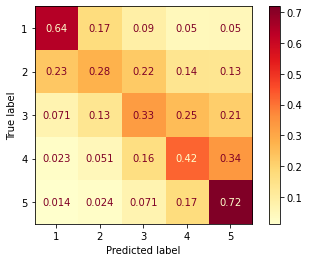

In [0]:
#Plot Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(selector, X_test, y_test, cmap=plt.cm.YlOrRd,normalize="true")

SMOTE

In [0]:
smote = SMOTE("minority")

In [0]:
X_sm, y_sm = smote.fit_sample(X_train, y_train)
ETclassifier.fit(X_sm, y_sm)

In [0]:
y_pred = ETclassifier.predict(X_test)

Measurements with SMOTE (after Feature Selection)

In [0]:
metrics.confusion_matrix(y_test, y_pred)

In [0]:
disp = plot_confusion_matrix(ETclassifier, X_test, y_test, cmap=plt.cm.YlGnBu,normalize="true")

In [0]:
# Accuracy 
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

#Misclassification rate 
misclassified = 1 - accuracy
print("Misclassification Rate:", misclassified)

# Precision, Recall and F Score
precision = metrics.precision_score(y_test,y_pred, average = "micro")
recall= metrics.recall_score(y_test, y_pred, average = 'micro')
f_measure = metrics.f1_score(y_test, y_pred, average = 'micro')
print("Precision:",precision)
print("Recall:",recall)
print("F-measure:",f_measure)

Class Weights

In [0]:
class_weights = list(class_weight.compute_class_weight("balanced", np.unique(y), y))

w_array = np.ones(y_train.shape[0], dtype = "float")
for i, val in enumerate(y_train):
    w_array[i] = class_weights[val-1]

ETclassifier.fit(X_train, y_train, sample_weight=w_array)

In [0]:
y_pred = ETclassifier.predict(X_test)

Measurements with Class Weights (after Feature Selection)

In [0]:
metrics.confusion_matrix(y_test, y_pred)

In [0]:
disp = plot_confusion_matrix(ETclassifier, X_test, y_test, cmap=plt.cm.Blues,normalize="true")

In [0]:
# Accuracy 
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

#Misclassification rate 
misclassified = 1 - accuracy
print("Misclassification Rate:", misclassified)

# Precision, Recall and F Score
precision = metrics.precision_score(y_test,y_pred, average = "micro")
recall= metrics.recall_score(y_test, y_pred, average = 'micro')
f_measure = metrics.f1_score(y_test, y_pred, average = 'micro')
print("Precision:",precision)
print("Recall:",recall)
print("F-measure:",f_measure)

SMOTE & Class Weights

In [0]:
X_sm, y_sm = smote.fit_sample(X_train, y_train)

In [0]:
class_weights = list(class_weight.compute_class_weight("balanced", np.unique(y), y))

w_array = np.ones(y_sm.shape[0], dtype = "float")
for i, val in enumerate(y_sm):
    w_array[i] = class_weights[val-1]

ETclassifier.fit(X_sm, y_sm, sample_weight=w_array)

In [0]:
y_pred = ETclassifier.predict(X_test)

Measurements with Class Weights & SMOTE (after Feature Selection)

In [0]:
metrics.confusion_matrix(y_test, y_pred)

In [0]:
disp = plot_confusion_matrix(ETclassifier, X_test, y_test, cmap=plt.cm.Blues,normalize="true")

In [0]:
# Accuracy 
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

#Misclassification rate 
misclassified = 1 - accuracy
print("Misclassification Rate:", misclassified)

# Precision, Recall and F Score
precision = metrics.precision_score(y_test,y_pred, average = "micro")
recall= metrics.recall_score(y_test, y_pred, average = 'micro')
f_measure = metrics.f1_score(y_test, y_pred, average = 'micro')
print("Precision:",precision)
print("Recall:",recall)
print("F-measure:",f_measure)

Randomized Search CV (Failed)

In [0]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [0]:
X_sm, y_sm = smote.fit_sample(X_train, y_train)

In [0]:
et_random = RandomizedSearchCV(estimator = ETclassifier, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=0)# Fit the random search model
et_random.fit(X_sm, y_sm)

In [0]:
predictions = et_random.predict(X_test)
#Confusion Matrix
print(metrics.confusion_matrix(y_test, predictions))
# Accuracy
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:", accuracy)

#Misclassification rate 
misclassified = 1 - accuracy
print("Misclassification Rate:", misclassified)
# Precision, Recall and F Score
precision = metrics.precision_score(y_test,predictions, average = 'micro')
recall = metrics.recall_score(y_test, predictions, average = 'micro')
f_measure = metrics.f1_score(y_test, predictions, average = 'micro')
print("Precision:",precision)
print("Recall:",recall)
print("F-measure:",f_measure)